<a href="https://colab.research.google.com/github/taehohoho/LESSON/blob/master/210930_CNN_Dogs_and_Cats_Mount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

tf.__version__

'2.6.0'

In [3]:
print('GPU information -', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU information - /device:GPU:0 

Thu Sep 30 06:56:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    73W / 149W |    121MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

ls: cannot access '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip': No such file or directory


In [12]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/MyDrive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  infl

In [13]:
!ls -l

total 20
drwx------ 5 root root 4096 Sep 30 06:57 drive
drwxr-xr-x 1 root root 4096 Sep 16 13:40 sample_data
drwxr-xr-x 4 root root 4096 Sep 30 07:05 test
drwxr-xr-x 4 root root 4096 Sep 30 07:05 train
drwxr-xr-x 4 root root 4096 Sep 30 07:05 validation


In [14]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기', data_batch.shape)
    print('배치 레이블 크기', labels_batch.shape)
    break

배치 데이터 크기 (20, 150, 150, 3)
배치 레이블 크기 (20,)


In [17]:
labels_batch

array([1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0.], dtype=float32)

In [20]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [22]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [23]:
%%time

Hist_dadc = model.fit(train_generator,
                      steps_per_epoch = 100,
                      epochs = 60,
                      validation_data = valid_generator,
                      validation_steps =50)

Epoch 1/60
100/100 [==============================] - 44s 116ms/step - loss: 0.7001 - accuracy: 0.5055 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 2/60
100/100 [==============================] - 11s 114ms/step - loss: 0.6857 - accuracy: 0.5435 - val_loss: 0.6599 - val_accuracy: 0.6110
Epoch 3/60
100/100 [==============================] - 11s 113ms/step - loss: 0.6565 - accuracy: 0.6260 - val_loss: 0.6552 - val_accuracy: 0.6170
Epoch 4/60
100/100 [==============================] - 11s 114ms/step - loss: 0.6194 - accuracy: 0.6550 - val_loss: 0.6336 - val_accuracy: 0.6470
Epoch 5/60
100/100 [==============================] - 11s 114ms/step - loss: 0.5718 - accuracy: 0.7025 - val_loss: 0.6196 - val_accuracy: 0.6640
Epoch 6/60
100/100 [==============================] - 12s 116ms/step - loss: 0.5299 - accuracy: 0.7280 - val_loss: 0.5897 - val_accuracy: 0.6870
Epoch 7/60
100/100 [==============================] - 12s 116ms/step - loss: 0.4543 - accuracy: 0.7755 - val_loss: 0.6551 - val_ac

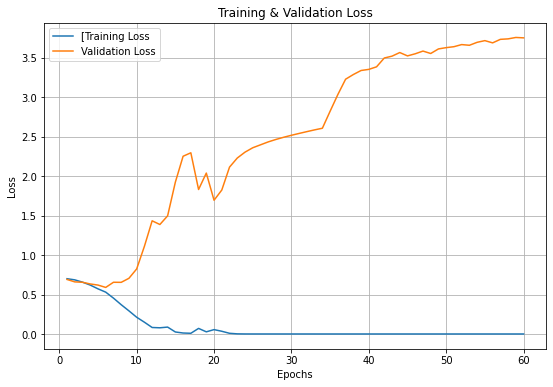

In [28]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dadc.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_dadc.history['loss'])
plt.plot(epochs, Hist_dadc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['[Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

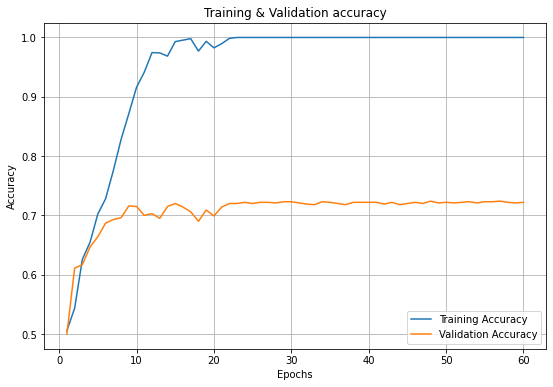

In [32]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dadc.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_dadc.history['accuracy'])
plt.plot(epochs, Hist_dadc.history['val_accuracy'])

plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [36]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [38]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('Loss = {:5f}'.format(loss))
print('Accuracy = {:5f}'.format(accuracy))

50/50 [==============================] - 3s 69ms/step - loss: 3.5387 - accuracy: 0.7430
Loss = 3.538669
Accuracy = 0.743000


In [39]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [42]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 40561
-rw------- 1 root root    34600 Sep 28 08:17 001_Model_iris.h5
-rw------- 1 root root 41498784 Sep 30 07:32 002_dogs_and_cats_small.h5


In [43]:
from tensorflow.keras.models import load_model

model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [45]:
loss, accuracy = model_small.evaluate(test_generator,
                                      steps = 50)

print('Loss = {:5f}'.format(loss))
print('Accuracy = {:5f}'.format(accuracy))

50/50 [==============================] - 4s 68ms/step - loss: 3.5387 - accuracy: 0.7430
Loss = 3.538670
Accuracy = 0.743000
